In [1]:
from pandas import DataFrame, read_csv

import matplotlib.pyplot as plt
import pandas as pd #this is how I usually import pandas
import sys #only needed to determine Python version number
import matplotlib #only needed to determine Matplotlib version number
from sklearn import tree

# Enable inline plotting
%matplotlib inline

In [2]:
androidAppFilePath = r'C:\Users\kumar\OneDrive\Documents\Projects\Appomania\data\external\Android\googleplaystore.csv'
andDF = pd.read_csv(androidAppFilePath)
andDF.head()


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [3]:
andRvFilePath = r'C:\Users\kumar\OneDrive\Documents\Projects\Appomania\data\external\Android\googleplaystore_user_reviews.csv'
andRevDF = pd.read_csv(andRvFilePath)
andRevDF.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000


In [4]:
andWRevDF = pd.merge(andDF,andRevDF,on=['App'],how='left')

In [5]:
andWRevDF.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,NaN,NaN,NaN,NaN
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,A kid's excessive ads. The types ads allowed a...,Negative,-0.250,1.000000
2,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,It bad >:(,Negative,-0.725,0.833333
3,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,like,Neutral,0.000,0.000000
4,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,NaN,NaN,NaN,NaN


In [7]:
andWRevDF = andWRevDF.drop_duplicates()

In [9]:
andSentDF = andWRevDF.drop(columns=['Category','Size','Type','Price','Content Rating','Genres','Last Updated','Current Ver','Android Ver','Translated_Review'])

In [10]:
andSentDF.head()

,App,Rating,Reviews,Installs,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,Photo Editor & Candy Camera & Grid & ScrapBook,4.1,159,"10,000+",NaN,NaN,NaN
1,Coloring book moana,3.9,967,"500,000+",Negative,-0.250,1.000000
2,Coloring book moana,3.9,967,"500,000+",Negative,-0.725,0.833333
3,Coloring book moana,3.9,967,"500,000+",Neutral,0.000,0.000000
4,Coloring book moana,3.9,967,"500,000+",NaN,NaN,NaN


In [11]:
from sklearn import preprocessing

le = preprocessing.LabelEncoder()
le.fit(andSentDF["App"])




LabelEncoder()

In [13]:
andSentDF["App"]= le.transform(andSentDF["App"]) 

#list(le.inverse_transform([2, 2, 1]))

In [17]:
andSentDF = andSentDF.dropna()

andSentDF.head()

,App,Rating,Reviews,Installs,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
1,2632,3.9,967,"500,000+",Negative,-0.250,1.000000
2,2632,3.9,967,"500,000+",Negative,-0.725,0.833333
3,2632,3.9,967,"500,000+",Neutral,0.000,0.000000
5,2632,3.9,967,"500,000+",Positive,0.500,0.600000
6,2632,3.9,967,"500,000+",Negative,-0.800,0.900000


In [19]:
andSentDF.loc[andSentDF['Sentiment'] == 'Negative', 'Sentiment'] = -1
andSentDF.loc[andSentDF['Sentiment'] == 'Neutral', 'Sentiment'] = 0
andSentDF.loc[andSentDF['Sentiment'] == 'Positive', 'Sentiment'] = 1
andSentDF.head()

,App,Rating,Reviews,Installs,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
1,2632,3.9,967,"500,000+",-1,-0.250,1.000000
2,2632,3.9,967,"500,000+",-1,-0.725,0.833333
3,2632,3.9,967,"500,000+",0,0.000,0.000000
5,2632,3.9,967,"500,000+",1,0.500,0.600000
6,2632,3.9,967,"500,000+",-1,-0.800,0.900000


In [26]:
andSentDF['Installs'] = andSentDF.Installs.str.replace("+","")
andSentDF['Installs'] = andSentDF.Installs.str.replace(",","")
andSentDF['Installs'] = andSentDF.Installs.astype('int64')

In [29]:
andSentDF.head()

,App,Rating,Reviews,Installs,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
1,2632,3.9,967,500000,-1,-0.250,1.000000
2,2632,3.9,967,500000,-1,-0.725,0.833333
3,2632,3.9,967,500000,0,0.000,0.000000
5,2632,3.9,967,500000,1,0.500,0.600000
6,2632,3.9,967,500000,-1,-0.800,0.900000


In [30]:
# Run K-means Clustering - with clusters count as 0
# 0 because of number of genres

from sklearn.cluster import KMeans
# Initializing KMeans
kmeans = KMeans(n_clusters=3)
# Fitting with inputs
kmeans = kmeans.fit(andSentDF)
# Predicting the clusters
labels = kmeans.predict(andSentDF)
# Getting the cluster centers
C = kmeans.cluster_centers_

In [35]:
# To Print the Clusters
import numpy as np
clustersTemp=kmeans.fit_predict(andSentDF)
#print clusters.shape
cluster_0t=np.where(clustersTemp==0)
print(cluster_0t)

(array([    0,     1,     2, ..., 40381, 40382, 40383], dtype=int64),)


In [40]:
le.inverse_transform(andSentDF.iloc[list(np.where(clustersTemp==2))[0]]['App'].unique()[:50])

C:\Users\kumar\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


array(['Google Duo - High Quality Video Calls', 'Candy Crush Saga',
       'Facebook Lite', 'Google Translate',
       'Gboard - the Google Keyboard', 'Dropbox',
       'Flipboard: News For Our Time'], dtype=object)

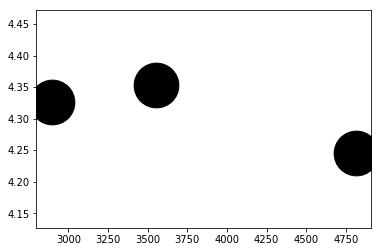

In [33]:

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=2000);

In [52]:
andSentGrpdDF = andSentDF.groupby(['App'])['Rating','Reviews','Installs','Sentiment','Sentiment_Polarity','Sentiment_Subjectivity'].mean()

In [74]:
# Run K-means Clustering - with clusters count as 0
# 0 because of number of genres

from sklearn.cluster import KMeans
# Initializing KMeans
kmeanGrp = KMeans(n_clusters=4)
# Fitting with inputs
kmeanGrp = kmeanGrp.fit(andSentGrpdDF)
# Predicting the clusters
labelsGrp = kmeanGrp.predict(andSentGrpdDF)
# Getting the cluster centers
CGrp = kmeanGrp.cluster_centers_

In [75]:
import numpy as np
clustersGrp=kmeanGrp.fit_predict(andSentGrpdDF)
#print clusters.shape
clustersGrp_0t=np.where(clustersGrp==0)
#print(clustersGrp_0t)

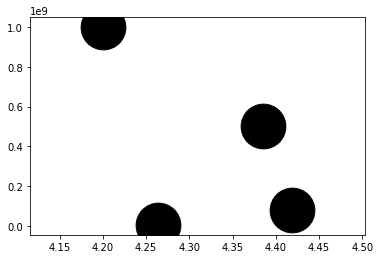

In [76]:
centersGrp = kmeanGrp.cluster_centers_
plt.scatter(centersGrp[:, 0], centersGrp[:, 1], c='black', s=2000);

In [85]:
le.inverse_transform((andSentGrpdDF.iloc[list(np.where(clustersGrp==0))[0],:]).index)

C:\Users\kumar\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


array(['2GIS: directory & navigator', '8 Ball Pool',
       'APUS Launcher - Theme, Wallpaper, Hide Apps', 'Account Manager',
       'AccuWeather: Daily Forecast & Live Weather Reports',
       'Adobe Acrobat Reader',
       'Adobe Photoshop Express:Photo Editor Collage Maker',
       'Advanced Task Killer', 'Agar.io', 'Akinator',
       'AliExpress - Smarter Shopping, Better Living', 'Amazon Kindle',
       'Amazon Prime Video', 'Amazon Shopping', 'Android Messages',
       'Anger of stick 5 : zombie', 'Angry Birds 2',
       'Angry Birds Classic', 'Angry Birds Rio', 'AppLock',
       'Asphalt 8: Airborne', 'Azar', 'B612 - Beauty & Filter Camera',
       'BBM - Free Calls & Messages', 'Backgrounds HD (Wallpapers)',
       'Bad Piggies', 'Badoo - Free Chat & Dating App',
       'BeautyPlus - Easy Photo Editor & Selfie Camera', 'Bible',
       'Booking.com Travel Deals', 'Bowmasters',
       'Brightest Flashlight Free ®', 'Bubble Witch 3 Saga',
       'CATS: Crash Arena Turbo Stars',
  

In [81]:
andSentGrpdDF.iloc[list(np.where(clustersGrp==3))[0],:]

,Rating,Installs,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
App,,,,,
2364,4.4,500000000.0,-0.100000,0.031068,0.456293
3480,4.4,500000000.0,0.500000,0.236331,0.443636
4332,4.3,500000000.0,-0.068966,-0.000991,0.456127
4524,4.4,500000000.0,0.769231,0.385865,0.433822
4819,4.2,500000000.0,0.078947,0.064587,0.517172
4925,4.6,500000000.0,0.722222,0.285690,0.497991
4945,4.4,500000000.0,1.000000,0.214167,0.490000


In [83]:
andSentGrpdDF.iloc[list(np.where(clustersGrp==1))[0],:]

,Rating,Installs,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
App,,,,,
4328,4.1,1.000000e+09,-0.046154,-0.005909,0.460871
4869,4.3,1.000000e+09,0.200000,0.058016,0.456138
4912,4.4,1.000000e+09,0.657895,0.260359,0.492744
4933,3.9,1.000000e+09,0.350000,0.093930,0.501439
4937,4.5,1.000000e+09,0.514851,0.187021,0.509305
4944,4.2,1.000000e+09,-0.750000,-0.500000,0.691667
4949,4.2,1.000000e+09,1.000000,0.368056,0.469444
5118,4.0,1.000000e+09,0.600000,0.239355,0.525005


In [86]:
andSentGrpdDF.iloc[list(np.where(clustersGrp==0))[0],:]

,Rating,Installs,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
App,,,,,
45,4.5,50000000.0,0.425000,0.223129,0.396658
101,4.5,100000000.0,0.020833,0.008782,0.508397
345,4.5,100000000.0,0.666667,0.439056,0.515833
478,4.1,100000000.0,-0.212121,-0.087635,0.456466
481,4.4,50000000.0,0.562500,0.200723,0.493706
513,4.3,100000000.0,0.479592,0.145425,0.486125
516,4.2,50000000.0,0.466667,0.147823,0.445765
534,4.4,50000000.0,0.533333,0.138852,0.436803
561,4.2,100000000.0,-0.021277,-0.053709,0.452531


IndexError: index 4 is out of bounds for axis 0 with size 4

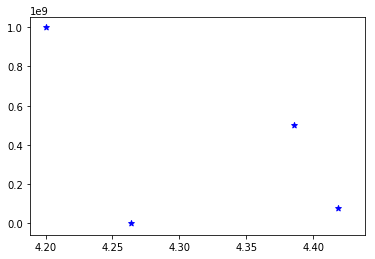

In [97]:
for i in range(0, clustersGrp.shape[0]):
    if kmeanGrp.labels_[i] == 1:
        c1 = plt.scatter(centersGrp[i,0],centersGrp[i,1],c='r',marker='+')
    elif kmeanGrp.labels_[i] == 0:
        c2 = plt.scatter(centersGrp[i,0],centersGrp[i,1],c='g',marker='o')
    elif kmeanGrp.labels_[i] == 2:
        c3 = plt.scatter(centersGrp[i,0],centersGrp[i,1],c='b',marker='*')
plt.legend([c1, c2, c3],['Cluster 1', 'Cluster 0','Cluster 2'])
plt.title('K-means clusters the Iris dataset into 3 clusters')
plt.show()

In [92]:
clustersGrp.size

816

In [96]:
centersGrp[1].size

5

In [98]:
clustersGrp.shape[0]

816

In [99]:
andSentGrpdDF.describe()

,Rating,Installs,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
count,816.000000,8.160000e+02,816.000000,816.000000,816.000000
mean,4.282271,2.670491e+07,0.440021,0.198639,0.490518
std,0.313294,1.099358e+08,0.321591,0.159847,0.084662
min,2.600000,1.000000e+03,-1.000000,-0.500000,0.000000
25%,4.100000,1.000000e+06,0.258961,0.082347,0.450244
50%,4.300000,2.000000e+06,0.473684,0.196592,0.496305
75%,4.500000,1.000000e+07,0.666667,0.297215,0.536927
max,4.900000,1.000000e+09,1.000000,1.000000,0.916667


In [110]:
andWRevDF[andWRevDF.App.isin(le.inverse_transform((andSentGrpdDF.iloc[list(np.where(clustersGrp==1))[0],:]).index))]

C:\Users\kumar\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
6238,Gmail,COMMUNICATION,4.3,4604324,Varies with device,"1,000,000,000+",Free,0,Everyone,Communication,"August 2, 2018",Varies with device,Varies with device,NaN,NaN,NaN,NaN
6251,Gmail,COMMUNICATION,4.3,4604324,Varies with device,"1,000,000,000+",Free,0,Everyone,Communication,"August 2, 2018",Varies with device,Varies with device,gets crashed I try open email clicking notific...,Neutral,0.000000,0.500000
6252,Gmail,COMMUNICATION,4.3,4604324,Varies with device,"1,000,000,000+",Free,0,Everyone,Communication,"August 2, 2018",Varies with device,Varies with device,Trying delete mails.. delete button top drive ...,Positive,0.309524,0.571429
6253,Gmail,COMMUNICATION,4.3,4604324,Varies with device,"1,000,000,000+",Free,0,Everyone,Communication,"August 2, 2018",Varies with device,Varies with device,The folder creation option. It useful could ma...,Positive,0.233939,0.324242
6254,Gmail,COMMUNICATION,4.3,4604324,Varies with device,"1,000,000,000+",Free,0,Everyone,Communication,"August 2, 2018",Varies with device,Varies with device,Long time user G-mail. Has always worked extre...,Positive,0.400998,0.664526
6255,Gmail,COMMUNICATION,4.3,4604324,Varies with device,"1,000,000,000+",Free,0,Everyone,Communication,"August 2, 2018",Varies with device,Varies with device,The frustrating part replying often defaults G...,Positive,0.300000,0.950000
6256,Gmail,COMMUNICATION,4.3,4604324,Varies with device,"1,000,000,000+",Free,0,Everyone,Communication,"August 2, 2018",Varies with device,Varies with device,Now seem receive emails..... Also I delete rea...,Neutral,0.000000,0.000000
6257,Gmail,COMMUNICATION,4.3,4604324,Varies with device,"1,000,000,000+",Free,0,Everyone,Communication,"August 2, 2018",Varies with device,Varies with device,Wth ... I tried contact someone already ... sh...,Negative,-0.137500,0.350000
6258,Gmail,COMMUNICATION,4.3,4604324,Varies with device,"1,000,000,000+",Free,0,Everyone,Communication,"August 2, 2018",Varies with device,Varies with device,I give 5 stars capability exists edit & create...,Positive,0.003745,0.481847
6259,Gmail,COMMUNICATION,4.3,4604324,Varies with device,"1,000,000,000+",Free,0,Everyone,Communication,"August 2, 2018",Varies with device,Varies with device,I really like gmail thing I really hate many a...,Negative,-0.115278,0.540278
